In [6]:
%pip install scipy
%pip install matplotlib


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 8.3 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 244.8/244.8 kB 5.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.2/103.2 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 4.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 5.0 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [8]:
#------ audio wave spectrum and spectrogram example ------
from scipy.io import wavfile # scipy library to read wav files
import numpy as np

AudioName = "audio_sample.wav" # Audio File
fs, Audiodata = wavfile.read(AudioName)

# Plot the audio signal in time
import matplotlib.pyplot as plt
plt.plot(Audiodata , color='blue')
plt.xlabel('Time'); 
plt.ylabel('Amplitude'); 
plt.title('Audio Signal in time',size=16)
plt.savefig('wave.png', dpi=600)
# spectrum
from scipy.fftpack import fft # fourier transform
n = len(Audiodata) 
AudioFreq = fft(Audiodata)
AudioFreq = AudioFreq[0:int(np.ceil((n+1)/2.0))] #Half of the spectrum
MagFreq = np.abs(AudioFreq) # Magnitude
MagFreq = MagFreq / float(n)
# power spectrum
MagFreq = MagFreq**2
if n % 2 > 0: # ffte odd 
    MagFreq[1:len(MagFreq)] = MagFreq[1:len(MagFreq)] * 2
else:# fft even
    MagFreq[1:len(MagFreq) -1] = MagFreq[1:len(MagFreq) - 1] * 2 

plt.figure()
freqAxis = np.arange(0,int(np.ceil((n+1)/2.0)), 1.0) * (fs / n);
plt.plot(freqAxis/1000.0, 10*np.log10(MagFreq) , color='blue') #Power spectrum
plt.xlabel('Frequency (kHz)'); 
plt.ylabel('Power spectrum (dB)');
plt.title('Spectrum ',size=16);
plt.savefig('spectrum.png', dpi=600)


#Spectrogram
from scipy import signal
N = 512 #Number of point in the fft
f, t, Sxx = signal.spectrogram(Audiodata, fs,window = signal.blackman(N),nfft=N)
plt.figure()
plt.pcolormesh(t, f,10*np.log10(Sxx)) # dB spectrogram
plt.xlabel('Time [seg]')
plt.title('Spectrogram ',size=16);
plt.savefig('Spectrogram.png', dpi=600)
plt.show()


# Plotting the spectrogram
plt.figure(figsize=(10, 4))
plt.imshow(spectrogram, aspect='auto', origin='lower', cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title(' Log Mel Spectrogram')
plt.xlabel('Time')
plt.ylabel('Mel Bands')
plt.tight_layout()

# Display the plot
plt.show()


ImportError: cannot import name 'blackman' from 'scipy.signal' (/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/signal/__init__.py)

In [11]:
% pip install librosa

270.49s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.1/260.1 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 12.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.1/414.1 kB 10.8 MB/s eta 0:00:00a 0:00:01


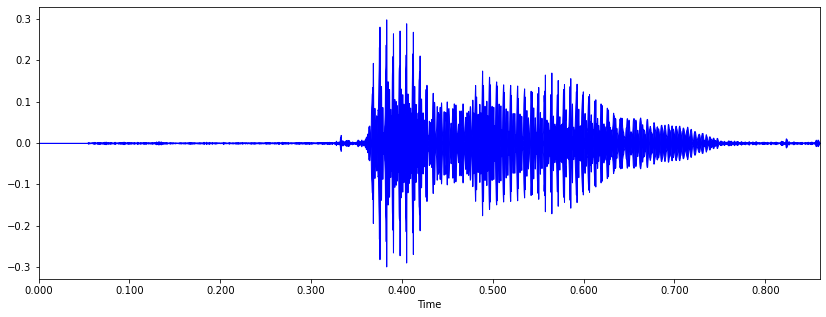

In [7]:
#------ audio wave mel-spectrogram example -----
#source: https://towardsdatascience.com/audio-deep-learning-made-simple-part-2-why-mel-spectrograms-perform-better-aad889a93505
import librosa

import librosa.display
import matplotlib.pyplot as plt

# Load the audio file
AUDIO_FILE = './audio_sample.wav'
samples, sample_rate = librosa.load(AUDIO_FILE, sr=None)


# x-axis has been converted to time using our sample rate. 
# matplotlib plt.plot(y), would output the same figure, but with sample 
# number on the x-axis instead of seconds
plt.figure(figsize=(14, 5))
librosa.display.waveplot(samples, sr=sample_rate, color='blue')


/opt/anaconda3/lib/python3.8/site-packages/librosa/display.py:954: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  warnings.warn(


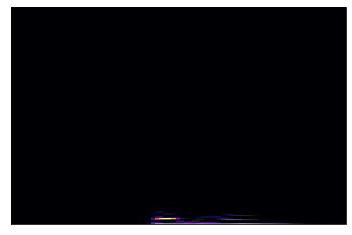

In [8]:
#--- Spectrogram -----
sgram = librosa.stft(samples)
librosa.display.specshow(sgram)


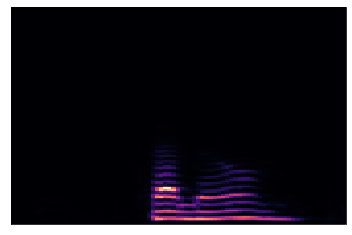

In [9]:

#------ mel-spectrogram 

sgram_mag, _ = librosa.magphase(sgram)
mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mel_scale_sgram)

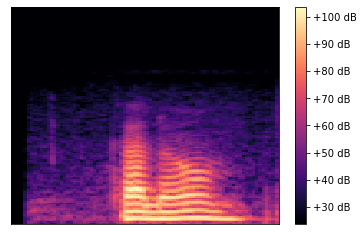

In [10]:
#------ mel-spectrogram with dB instead of Hz
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate)
plt.colorbar(format='%+2.0f dB')

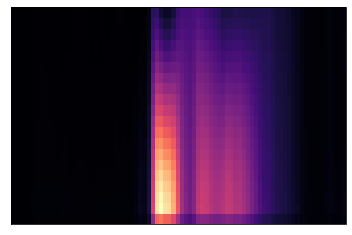

In [12]:
mfcc = librosa.feature.mfcc(S=sgram_mag, sr=sample_rate)
librosa.display.specshow(mfcc, sr=sample_rate)


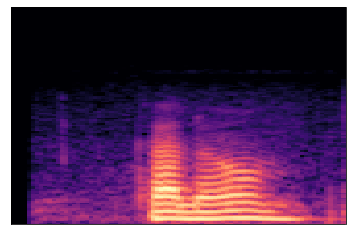

In [13]:
mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
librosa.display.specshow(mel_sgram, sr=sample_rate)
